In [13]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
#1) import des données
df = pd.read_csv('comments.csv')

In [15]:
pd.set_option('display.max_rows', 20)
df['event'].value_counts()[:100]
# Copie de "event" 
df["og_event"] = df["event"]

In [16]:
df['word_count'] = df["event"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["event"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["event"].apply(lambda x: len(str(x).split(". ")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df

,event,og_event,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,il souhaite faire une loa sur une duree de 24 mois,il souhaite faire une loa sur une duree de 24 mois,11,40,1,3.636364,11.0
1,il souhaite financer le vehicule au comptant ou aupres de sa banque.,il souhaite financer le vehicule au comptant ou aupres de sa banque.,12,57,1,4.750000,12.0
2,elle est a l'ecoute des offres en loa avec un apport de 5.000eur.,elle est a l'ecoute des offres en loa avec un apport de 5.000eur.,13,53,1,4.076923,13.0
3,elle ne sait pas par quelle mode de financement opter.,elle ne sait pas par quelle mode de financement opter.,10,45,1,4.500000,10.0
4,il souhaite un credit pour professionnel.,il souhaite un credit pour professionnel.,6,36,1,6.000000,6.0
...,...,...,...,...,...,...,...
14054,il souhaite un credit aupres de sa banque.,il souhaite un credit aupres de sa banque.,8,35,1,4.375000,8.0
14055,elle fait un credit partiel aupres de sa banque.,elle fait un credit partiel aupres de sa banque.,9,40,1,4.444444,9.0
14056,il est a l'ecoute des offres de credit partiel.,il est a l'ecoute des offres de credit partiel.,9,39,1,4.333333,9.0
14057,il souhaite une offre pour un credit a titre comparatif.,il souhaite une offre pour un credit a titre comparatif.,10,47,1,4.700000,10.0


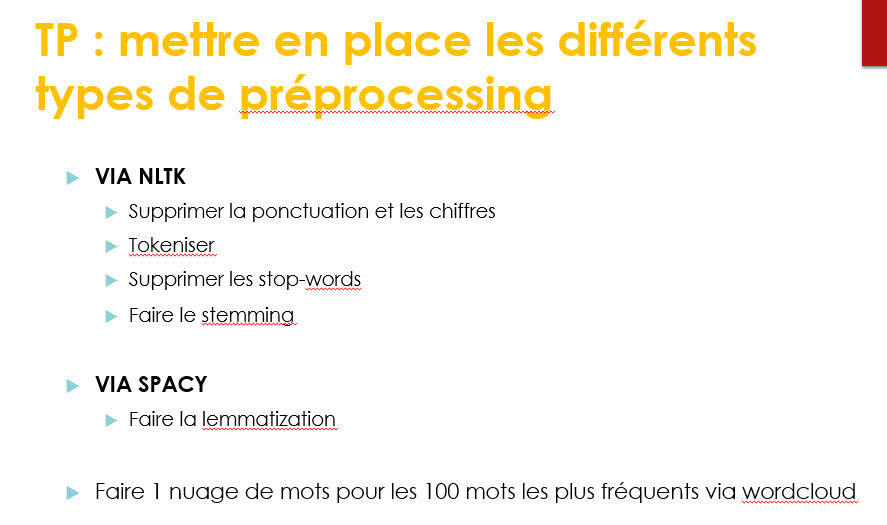

In [17]:
# 1)on supprime la ponctuation et les chiffres

df['event'] = df['event'].map(lambda x : re.sub('[,\.!?]','',x))\
.map(lambda x : re.sub('\d', '', x))

In [18]:
df.head()

,event,og_event,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,il souhaite faire une loa sur une duree de mois,il souhaite faire une loa sur une duree de 24 mois,11,40,1,3.636364,11.0
1,il souhaite financer le vehicule au comptant ou aupres de sa banque,il souhaite financer le vehicule au comptant ou aupres de sa banque.,12,57,1,4.750000,12.0
2,elle est a l'ecoute des offres en loa avec un apport de eur,elle est a l'ecoute des offres en loa avec un apport de 5.000eur.,13,53,1,4.076923,13.0
3,elle ne sait pas par quelle mode de financement opter,elle ne sait pas par quelle mode de financement opter.,10,45,1,4.500000,10.0
4,il souhaite un credit pour professionnel,il souhaite un credit pour professionnel.,6,36,1,6.000000,6.0


In [19]:
for x in re.split('\s',df.event[0]):
  print(x)

il
souhaite
faire
une
loa
sur
une
duree
de

mois


In [25]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /home/greg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/greg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
#2)  on supprime les stop-words
french_stopwords = stopwords.words('french')
french_stopwords = french_stopwords + ['euro', 'euros', 'eur', 'km']

df['event'] = df.event.apply(lambda x: [item for item in re.split('\s',x) if item not in french_stopwords])

In [22]:
" ".join(df['event'][0])

'souhaite faire loa duree  mois'

In [23]:
df['event'] = df['event'].apply(lambda x : " ".join(x))

In [26]:
#3) Tokenization

df['event_tokenized'] = df['event'].apply(lambda x : nltk.word_tokenize(x))
df['event'] = df['event'].apply(lambda x : nltk.word_tokenize(x))

In [27]:
df.head()

,event,og_event,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,event_tokenized
0,"[souhaite, faire, loa, duree, mois]",il souhaite faire une loa sur une duree de 24 mois,11,40,1,3.636364,11.0,"[souhaite, faire, loa, duree, mois]"
1,"[souhaite, financer, vehicule, comptant, aupres, banque]",il souhaite financer le vehicule au comptant ou aupres de sa banque.,12,57,1,4.750000,12.0,"[souhaite, financer, vehicule, comptant, aupres, banque]"
2,"[a, l'ecoute, offres, loa, apport]",elle est a l'ecoute des offres en loa avec un apport de 5.000eur.,13,53,1,4.076923,13.0,"[a, l'ecoute, offres, loa, apport]"
3,"[sait, quelle, mode, financement, opter]",elle ne sait pas par quelle mode de financement opter.,10,45,1,4.500000,10.0,"[sait, quelle, mode, financement, opter]"
4,"[souhaite, credit, professionnel]",il souhaite un credit pour professionnel.,6,36,1,6.000000,6.0,"[souhaite, credit, professionnel]"


In [28]:
#4) Stemming
stemmer = SnowballStemmer('french')
df['event'] = df.event.apply(lambda x: [stemmer.stem(item) for item in x])
print(df.iloc[2])

event                                    [a, l'ecout, offre, lo, apport]
og_event               elle est a l'ecoute des offres en loa avec un ...
word_count                                                            13
char_count                                                            53
sentence_count                                                         1
avg_word_length                                                 4.076923
avg_sentence_lenght                                                 13.0
event_tokenized                       [a, l'ecoute, offres, loa, apport]
Name: 2, dtype: object


In [32]:
#4bis) Lemmatization Attntion ici faites post stemming.. Ce qui n'est pas la bonne pratique. Je vous laisse donc modifier l'enchainement des df et me revenir si vous avez des questions.
doc = nlp(" ".join(df.iloc[5][0]))
for token in doc:
    print(token, token.lemma_)

ouvert ouvert
a avoir
plus plus
inform inform
cred cred


In [33]:
print(df.iloc[2])

event                                    [a, l'ecout, offre, lo, apport]
og_event               elle est a l'ecoute des offres en loa avec un ...
word_count                                                            13
char_count                                                            53
sentence_count                                                         1
avg_word_length                                                 4.076923
avg_sentence_lenght                                                 13.0
event_tokenized                       [a, l'ecoute, offres, loa, apport]
Name: 2, dtype: object


count vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()

In [35]:
df['event_1'] = df['event'].apply(lambda x: " ".join(x))

In [36]:
X = vectorizer.fit_transform(df.event_1)

In [37]:
vectorizer.get_feature_names()

/home/greg/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abord',
 'aborde',
 'accept',
 'accord',
 'achat',
 'achet',
 'acompt',
 'acquer',
 'activit',
 'actuel',
 'adapte',
 'administr',
 'adopt',
 'adress',
 'affich',
 'afin',
 'age',
 'ai',
 'aid',
 'ains',
 'ajout',
 'aller',
 'ami',
 'ample',
 'an',
 'anne',
 'annonc',
 'annuel',
 'anso',
 'antar',
 'anuel',
 'appaort',
 'appliqu',
 'apport',
 'apportdonc',
 'apportil',
 'approxim',
 'apr',
 'apre',
 'argent',
 'argus',
 'arriv',
 'artisan',
 'assimil',
 'associ',
 'assur',
 'assureur',
 'attend',
 'attent',
 'aucun',
 'audi',
 'aupr',
 'auss',
 'austospher',
 'auto',
 'autopher',
 'autopsher',
 'autopsherefr',
 'autosper',
 'autotropher',
 'autour',
 'autr',
 'avant',
 'avantag',
 'avantagi',
 'ave',
 'avecc',
 'avecv',
 'avis',
 'avoir',
 'avril',
 'axauto',
 'bail',
 'bais',
 'ballon',
 'bancair',
 'banqu',
 'banquier',
 'bas',
 'batter',
 'benefic',
 'benefici',
 'besoin',
 'bi',
 'bmw',
 'bon',
 'bonus',
 'budget',
 'ca',
 'cadr',
 'calcul',
 'capacit',
 'car',
 'cart',
 'cas',
 

In [38]:
print(X.toarray()[:10,])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
X = pd.DataFrame(X.toarray())

In [40]:
X.columns = vectorizer.get_feature_names()

In [41]:
X.columns

Index(['abord', 'aborde', 'accept', 'accord', 'achat', 'achet', 'acompt',
       'acquer', 'activit', 'actuel',
       ...
       'vir', 'voir', 'voit', 'voitur', 'vol', 'vouloir', 'vous', 'vr', 'vtc',
       'vw'],
      dtype='object', length=725)

In [42]:
X.sort_values(by=['abord','aborde','accept'], ascending=False).head(15)

,abord,aborde,accept,accord,achat,achet,acompt,acquer,activit,actuel,...,vir,voir,voit,voitur,vol,vouloir,vous,vr,vtc,vw
4867,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9508,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11685,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1878,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10397,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#TF IDF:
vectorizer = TfidfVectorizer()
x_tf_idf = vectorizer.fit_transform(df["event_1"])

In [44]:
words = vectorizer.get_feature_names()

/home/greg/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
x_tf_idf = pd.DataFrame(x_tf_idf)

In [46]:
#x_tf_idf = sort_values()

In [47]:
# affichage de la matrice 


SquidGame est la nouvelle série Netflix à succès.
	NP     V       ADJ		NC   NP 		NC

Chez HETIC, on aime le NLP.

In [48]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/greg/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [49]:
# tagging en EN via nltk
text = nltk.word_tokenize("Do you have a licence mate ?")
tagged_text=nltk.pos_tag(text)
print(tagged_text)


[('Do', 'VBP'), ('you', 'PRP'), ('have', 'VB'), ('a', 'DT'), ('licence', 'NN'), ('mate', 'NN'), ('?', '.')]


In [50]:
# Tagging en FR via Spacy
nlp = spacy.load("fr_core_news_sm")
def tag_pos_spacy(doc):
  doc = nlp(doc)
  return [token.pos for token in doc]

df['tag_pos'] = df["og_event"].apply(lambda x: tag_pos_spacy(x))


OSError: [E050] Can't find model 'fr_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
df[["og_event", "tag_pos", "tag"]]

,og_event,tag_pos,tag
0,il souhaite faire une loa sur une duree de 24 ...,"[95, 100, 100, 90, 92, 85, 90, 92, 85, 93, 92]","[PRON, VERB, VERB, DET, NOUN, ADP, DET, NOUN, ..."
1,il souhaite financer le vehicule au comptant o...,"[95, 100, 100, 90, 92, 85, 92, 89, 92, 85, 90,...","[PRON, VERB, VERB, DET, NOUN, ADP, NOUN, CCONJ..."
2,elle est a l'ecoute des offres en loa avec un ...,"[95, 87, 100, 90, 92, 85, 92, 85, 92, 85, 90, ...","[PRON, AUX, VERB, DET, NOUN, ADP, NOUN, ADP, N..."
3,elle ne sait pas par quelle mode de financemen...,"[95, 86, 100, 86, 85, 90, 92, 85, 92, 100, 97]","[PRON, ADV, VERB, ADV, ADP, DET, NOUN, ADP, NO..."
4,il souhaite un credit pour professionnel.,"[95, 100, 90, 92, 85, 92, 97]","[PRON, VERB, DET, NOUN, ADP, NOUN, PUNCT]"
...,...,...,...
14054,il souhaite un credit aupres de sa banque.,"[95, 100, 90, 92, 84, 85, 90, 92, 97]","[PRON, VERB, DET, NOUN, ADJ, ADP, DET, NOUN, P..."
14055,elle fait un credit partiel aupres de sa banque.,"[95, 100, 90, 92, 84, 84, 85, 90, 92, 97]","[PRON, VERB, DET, NOUN, ADJ, ADJ, ADP, DET, NO..."
14056,il est a l'ecoute des offres de credit partiel.,"[95, 87, 87, 90, 92, 85, 92, 85, 92, 84, 97]","[PRON, AUX, AUX, DET, NOUN, ADP, NOUN, ADP, NO..."
14057,il souhaite une offre pour un credit a titre c...,"[95, 100, 90, 92, 85, 90, 92, 87, 92, 84, 97]","[PRON, VERB, DET, NOUN, ADP, DET, NOUN, AUX, N..."


In [ ]:
df["tag"]

0        [PRON, VERB, VERB, DET, NOUN, ADP, DET, NOUN, ...
1        [PRON, VERB, VERB, DET, NOUN, ADP, NOUN, CCONJ...
2        [PRON, AUX, VERB, DET, NOUN, ADP, NOUN, ADP, N...
3        [PRON, ADV, VERB, ADV, ADP, DET, NOUN, ADP, NO...
4                [PRON, VERB, DET, NOUN, ADP, NOUN, PUNCT]
                               ...                        
14054    [PRON, VERB, DET, NOUN, ADJ, ADP, DET, NOUN, P...
14055    [PRON, VERB, DET, NOUN, ADJ, ADJ, ADP, DET, NO...
14056    [PRON, AUX, AUX, DET, NOUN, ADP, NOUN, ADP, NO...
14057    [PRON, VERB, DET, NOUN, ADP, DET, NOUN, AUX, N...
14058                       [PRON, VERB, DET, NOUN, PUNCT]
Name: tag, Length: 14059, dtype: object

In [ ]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation

